# Introduction to pandas, visualizing Titanic

## Master 2 TSE

#### Raphaël Sourty

In [32]:
import pandas as pd
import numpy as np

#### You can download the data here: https://www.kaggle.com/c/titanic/data

In [88]:
df = pd.read_csv('train.csv')

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Variable 	| Definition                                 	| Key                                            	|
|----------	|--------------------------------------------	|------------------------------------------------	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| # of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

In [90]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Who are the survivors of the Titanic?

#### Survival rate

In [91]:
df.groupby('Survived')['PassengerId'].agg(['count'])

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived'>

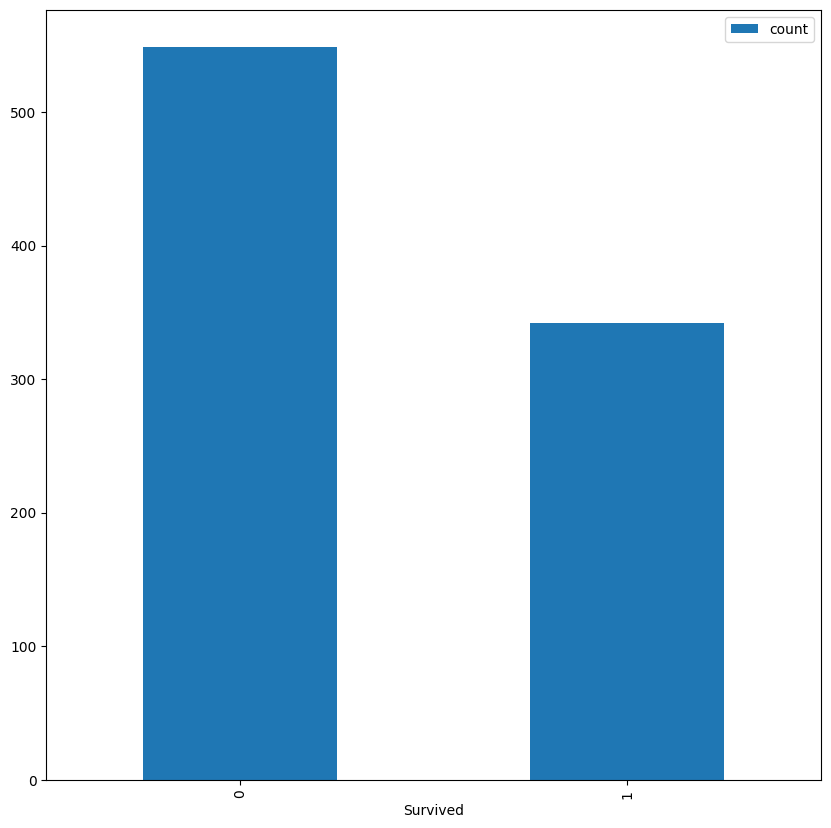

In [92]:
df.groupby('Survived')['PassengerId'].agg(
    ['count']
).reset_index().plot(x='Survived', y='count', kind = 'bar', figsize = (10, 10))

#### Survival rate depending on genre

In [93]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count'])

count
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

In [94]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count']).unstack()

count     
Sex      female male
Survived            
0            81  468
1           233  109

<Axes: xlabel='Survived'>

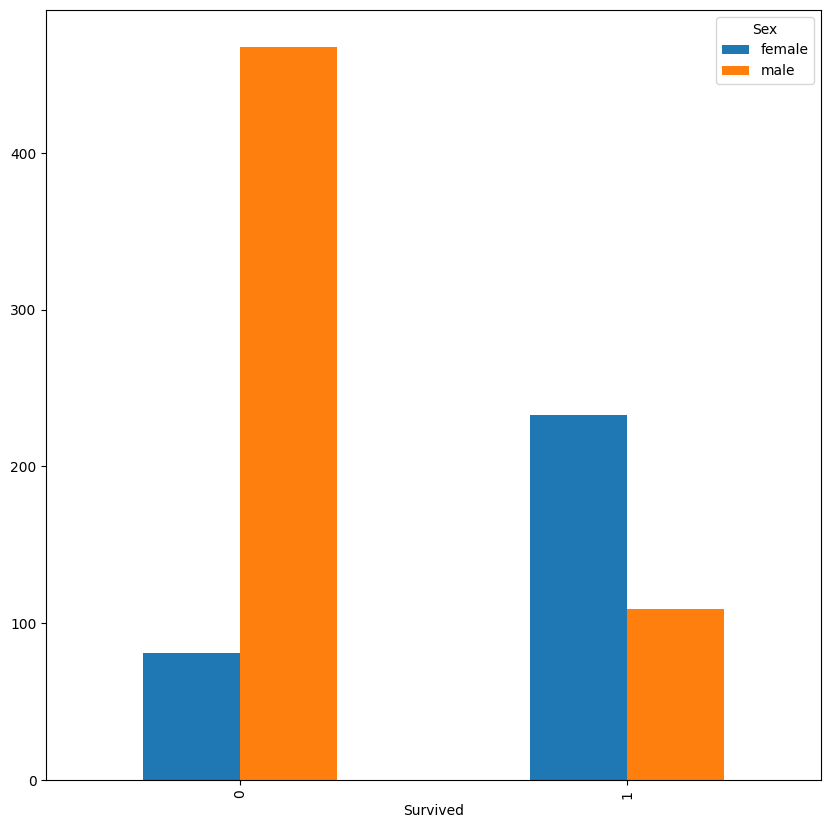

In [95]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Ticket class

In [96]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].agg(
    ['count']
)

count
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

In [97]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].count().unstack()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Survived'>

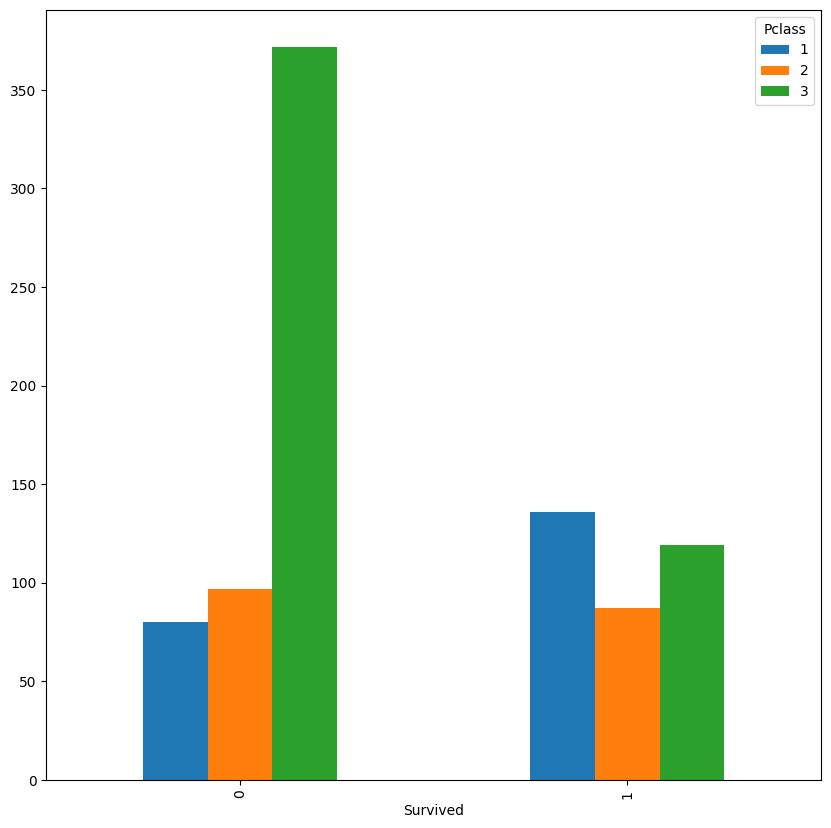

In [98]:
df.groupby(
    ['Survived', 'Pclass']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Age

In [99]:
df.dropna(inplace=True)
df['generation'] = pd.cut(df['Age'], 8)

In [100]:
df['Fare']

1      71.2833
3      53.1000
6      51.8625
10     16.7000
11     26.5500
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 183, dtype: float64

In [101]:
# [(0.34, 10.368] 
# (10.368, 20.315] 
# (20.315, 30.263] 
# (30.263, 40.21] 
# (40.21, 50.158] 
# (50.158, 60.105] 
# (60.105, 70.052] 
# (70.052, 80.0]]

pd.cut(np.array(df['Age']), 8)

[(30.575, 40.46], (30.575, 40.46], (50.345, 60.23], (0.841, 10.805], (50.345, 60.23], ..., (40.46, 50.345], (30.575, 40.46], (50.345, 60.23], (10.805, 20.69], (20.69, 30.575]]
Length: 183
Categories (8, interval[float64, right]): [(0.841, 10.805] < (10.805, 20.69] < (20.69, 30.575] < (30.575, 40.46] < (40.46, 50.345] < (50.345, 60.23] < (60.23, 70.115] < (70.115, 80.0]]

In [102]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,"(40.46, 50.345]"
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,"(30.575, 40.46]"
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,"(50.345, 60.23]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.805, 20.69]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20.69, 30.575]"


C:\Users\Rodrigue\AppData\Local\Temp\ipykernel_2784\1201001995.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


<Axes: xlabel='Survived'>

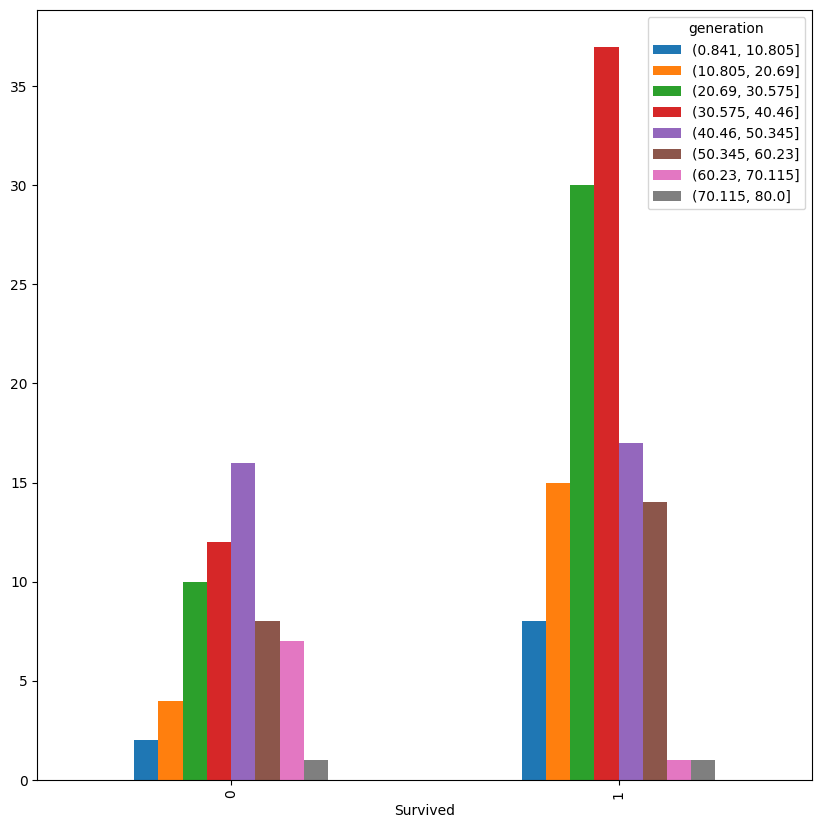

In [103]:
df.groupby(
    ['Survived', 'generation']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Fare

In [104]:
df['fare_category'] = pd.cut(df['Fare'], 12)

In [105]:
pd.cut(df['Fare'], 10)

1      (51.233, 102.466]
3      (51.233, 102.466]
6      (51.233, 102.466]
10      (-0.512, 51.233]
11      (-0.512, 51.233]
             ...        
871    (51.233, 102.466]
872     (-0.512, 51.233]
879    (51.233, 102.466]
887     (-0.512, 51.233]
889     (-0.512, 51.233]
Name: Fare, Length: 183, dtype: category
Categories (10, interval[float64, right]): [(-0.512, 51.233] < (51.233, 102.466] < (102.466, 153.699] < (153.699, 204.932] ... (307.398, 358.63] < (358.63, 409.863] < (409.863, 461.096] < (461.096, 512.329]]

C:\Users\Rodrigue\AppData\Local\Temp\ipykernel_2784\2369799790.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


<Axes: xlabel='Survived'>

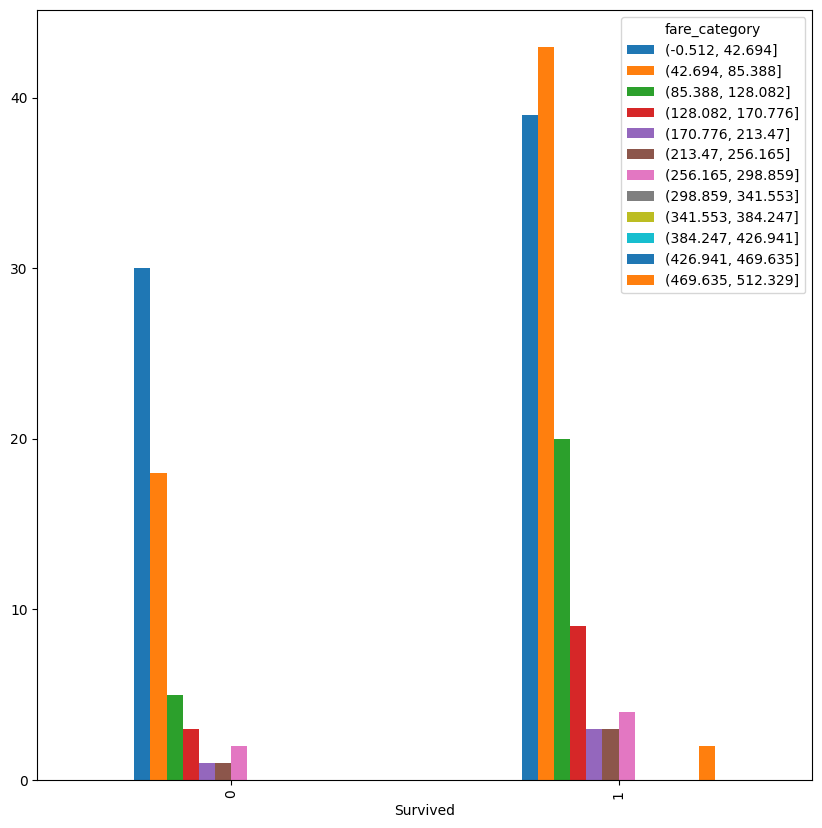

In [106]:
df.groupby(
    ['Survived', 'fare_category']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### What about correlations?

In [107]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr()

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.034542,-0.254085,0.134241,0.106346,0.023582
Pclass,-0.034542,1.000000,-0.306514,-0.315235,-0.103592,0.047496
Age,-0.254085,-0.306514,1.000000,-0.092424,-0.156162,-0.271271
Fare,0.134241,-0.315235,-0.092424,1.000000,0.286433,0.389740
SibSp,0.106346,-0.103592,-0.156162,0.286433,1.000000,0.255346
Parch,0.023582,0.047496,-0.271271,0.389740,0.255346,1.000000


In [108]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.034542,-0.254085,0.134241,0.106346,0.023582
Pclass,-0.034542,1.000000,-0.306514,-0.315235,-0.103592,0.047496
Age,-0.254085,-0.306514,1.000000,-0.092424,-0.156162,-0.271271
Fare,0.134241,-0.315235,-0.092424,1.000000,0.286433,0.389740
SibSp,0.106346,-0.103592,-0.156162,0.286433,1.000000,0.255346
Parch,0.023582,0.047496,-0.271271,0.389740,0.255346,1.000000


## Questions:

##### Cabins on the port side have an even number and cabins on the starboard side have an odd number. 

#### For example, cabin B57 is located on the starboard side.

#### Which side of the boat is better to be on? 


#### The deck number of the boat is indicated on the ticket. Cabin B57 is located on deck B. Which deck is best to be on?

#### Where is the best place to be on the boat in general?

#### Is there a link between the number of parents/family on the boat and chances of survival?

In [121]:
# Which side of the boat is better to be on?
def get_side(X):
    if X[-1].isdigit():
        return 'port' if int(X[-1]) % 2 == 0 else 'starboard'
    return None

df['side'] = (df['Cabin']).apply(get_side)
df.groupby('side')['Survived'].mean()
#starboard

side
port         0.628866
starboard    0.731707
Name: Survived, dtype: float64

In [122]:
#The deck number of the boat is indicated on the ticket. Cabin B57 is located on deck B. Which deck is best to be on?
def get_deck(X):
    return X[0]

df['deck'] = (df['Cabin']).apply(get_deck)
df.groupby('deck')['Survived'].mean()
#B

deck
A    0.583333
B    0.744186
C    0.588235
D    0.741935
E    0.733333
F    0.636364
G    0.500000
T    0.000000
Name: Survived, dtype: float64

In [135]:
# Where is the best place to be on the boat in general?
# deck B starboard side

In [140]:
# Is there a link between the number of parents/family on the boat and chances of survival?
df.groupby('Parch')['Survived'].mean()

Parch
0    0.655738
1    0.702703
2    0.739130
4    0.000000
Name: Survived, dtype: float64

#### What is the typical profile of the person who will survive the shipwreck?

#### What is the typical profile of the person who will not survive the shipwreck?